# MUSHROOMS

## Binary Classification

### Imports

In [2]:
import os
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

### Load Data

In [3]:
DATA_PATH = '../DATA/'
FILE_NAME = 'mushrooms.csv'
def load_data(data_path=DATA_PATH, file_name=FILE_NAME):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path)

dataset = load_data()

### View Data and Informations

In [4]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
edible, poisonous = dataset['class'].value_counts()

print("Edible:\t  ", edible,"\nPoisonous:", poisonous)

Edible:	   4208 
Poisonous: 3916


In [7]:
# Categorical to numerical
labels = {'e': 0, 'p': 1}
dataset['class'].replace(labels, inplace=True)

edible, poisonous = dataset['class'].value_counts()
print("0 - Edible:   ", edible,"\n1 - Poisonous:", poisonous)

0 - Edible:    4208 
1 - Poisonous: 3916


### Split Dataset

#### Get the Labels

In [8]:
X, y =  dataset.drop('class', axis=1), dataset['class'].copy()

print("X:",X.shape,"\ny:",y.shape)

X: (8124, 22) 
y: (8124,)


#### Train Set and Test Set

In [9]:
from sklearn.model_selection import train_test_split
X_white = pd.DataFrame()
X_not_white = pd.DataFrame()
y_white = pd.Series(dtype='float64')
y_not_white = pd.Series(dtype='float64')
for i in range(0,len(X)):
    if X.loc[i,"cap-color"] == "w":
        X_white = X_white.append(X.iloc[i,:])
        y_white = y_white.append(pd.Series(y.iloc[i]))
    else:
        X_not_white = X_not_white.append(X.iloc[i,:])
        y_not_white = y_not_white.append(pd.Series(y.iloc[i]))

In [10]:
X_train_not_white, X_test_not_white, y_train_not_white, y_test_not_white = train_test_split(X_not_white, y_not_white, test_size=1-(6905/(8124-len(X_white))), random_state=29)

# print(X_test_white)
X_train_white = (X_train_not_white)
X_test_white = X_white.append(X_test_not_white)
y_train_white = (y_train_not_white)
y_test_white = y_white.append(y_test_not_white)

In [11]:
from sklearn.utils import shuffle
X_train_full = shuffle(X_train_white, random_state=29)
X_test = shuffle(X_test_white, random_state=29)
y_train_full = shuffle(y_train_white, random_state=29)
y_test = shuffle(y_test_white, random_state=29)

In [12]:
# print(X_test[:5])
# print(y_test.loc[:,"0"])
# from sklearn.model_selection import train_test_split

# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=29)

# print("85% - X_train size:", X_train_full.shape[0], " y_train size:", y_train_full.shape[0])
# print("15% - X_test size: ", X_test.shape[0], " y_test size: ", y_test.shape[0])

#### Validation Set

In [13]:
X_valid, X_train = X_train_full[:500], X_train_full[500:]
y_valid, y_train = y_train_full[:500], y_train_full[500:]

print("X_train:", X_train.shape[0], "y_train", y_train.shape[0])
print("X_valid: ", X_valid.shape[0], "y_valid ", y_valid.shape[0])
print("X_test: ", X_test.shape[0])

X_train: 6405 y_train 6405
X_valid:  500 y_valid  500
X_test:  1219


### Prepare the Data

#### Data Transformation

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_attr_pipeline = Pipeline([
                        ('encoder', OrdinalEncoder())
                    ])

cols = list(X)
pipeline = ColumnTransformer([
                ('cat_attr_pipeline', cat_attr_pipeline, cols)
            ])


X_train = pipeline.fit_transform(X_train)
X_valid = pipeline.fit_transform(X_valid)
X_test  = pipeline.fit_transform(X_test)

### Neural Network

#### Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [16]:
tf.random.set_seed(29)

In [17]:
model = Sequential([
    InputLayer(input_shape=(22,)),    # input  layer
    Dense(45, activation='relu'),     # hidden layer
    Dense(1,   activation='sigmoid')  # output layer
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                1035      
                                                                 
 dense_1 (Dense)             (None, 1)                 46        
                                                                 
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model

In [19]:
model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#### Prepare Callbacks

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('../SavedModels/best_model.h5',
                                save_best_only=True)

early_stopping_cb = EarlyStopping(patience=3,
                                  restore_best_weights=True)

### Training

In [21]:
train_model = model.fit(X_train, y_train,
                        epochs=100,
                        validation_data=(X_valid, y_valid),
                        callbacks=[checkpoint_cb, early_stopping_cb])
                        


Epoch 1/100
201/201 [==============================] - 2s 4ms/step - loss: 0.3957 - accuracy: 0.8495 - val_loss: 0.3534 - val_accuracy: 0.8840
Epoch 2/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2769 - accuracy: 0.9105 - val_loss: 0.2984 - val_accuracy: 0.9120
Epoch 3/100
201/201 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9290 - val_loss: 0.2499 - val_accuracy: 0.9220
Epoch 4/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2170 - accuracy: 0.9393 - val_loss: 0.2171 - val_accuracy: 0.9440
Epoch 5/100
201/201 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.9488 - val_loss: 0.1903 - val_accuracy: 0.9500
Epoch 6/100
201/201 [==============================] - 0s 1ms/step - loss: 0.1846 - accuracy: 0.9499 - val_loss: 0.1800 - val_accuracy: 0.9520
Epoch 7/100
201/201 [==============================] - 0s 1ms/step - loss: 0.1722 - accuracy: 0.9522 - val_loss: 0.2727 - val_accuracy: 0.9160

#### Learning Curves

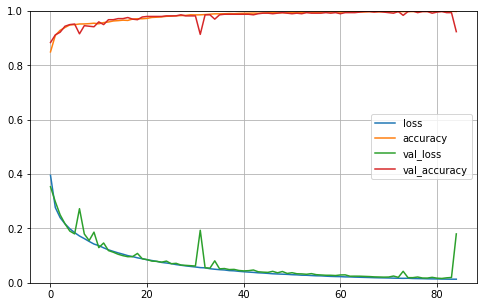

In [22]:
pd.DataFrame(train_model.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Evaluate the Best Model on Test Set

In [23]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

39/39 [==============================] - 0s 2ms/step - loss: 0.2818 - accuracy: 0.8975
test loss, test acc: [0.28180769085884094, 0.8974569439888]


#### Confusion Matrix

In [24]:
import seaborn as sns

#Parameters
title = 'Confusion Matrix'
custom_color = '#ffa600'   

#Function for drawing confusion matrix
def draw_confusion_matrix(cm, title = title, color = custom_color):
    palette = sns.light_palette(color, as_cmap=True)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='d', cmap=palette)
    # Title
    ax.set_title('\n' + title + '\n',
                 fontweight='bold',
                 fontstyle='normal', 
                )
    # x y labels 
    ax.set_xlabel('Predicted', fontweight='bold')
    ax.set_ylabel('Actual', fontweight='bold');
    # Classes names
    x_names = ['Poisonous', 'Edible']
    y_names = ['Poisonous', 'Edible']
    ax.xaxis.set_ticklabels(x_names, ha = 'center')
    ax.yaxis.set_ticklabels(y_names, va = 'center')

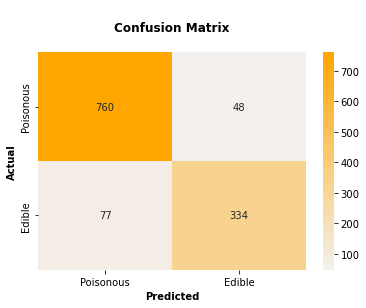

In [25]:
from sklearn.metrics import confusion_matrix

y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_test_pred)

draw_confusion_matrix(cm)

#### ROC Curve

In [26]:
#Function for plotting the ROC curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, custom_color, label='Area: %0.3f' %roc_auc, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate - Recall')
    plt.legend(loc='lower right')
    plt.show()

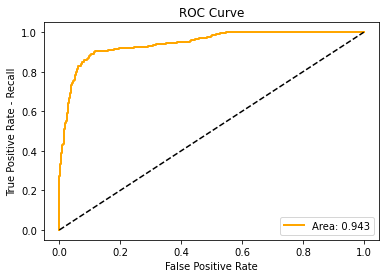

In [27]:
from sklearn.metrics import roc_curve, auc

y_test_prob = model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plot_roc_curve(fpr, tpr, roc_auc)

### Make Some Predictions

In [28]:
X_new = X_test[:5]
y_prob = model.predict(X_new)
# print(y_prob.round(3))

In [29]:
y_pred = (model.predict(X_new) > 0.5).astype("int32")
# print(y_pred)

## KL Divergence

In [30]:
# X_new = X_test[:5]
X_df = pd.DataFrame(model.predict(X_test))
y_test_pred = pd.DataFrame(y_test_pred).reset_index(drop=True)
X_df = pd.concat([X_df, y_test_pred], axis=1)
y_test = y_test.reset_index(drop=True)
X_df = pd.concat([X_df, y_test], axis=1)
X_df.columns = ["X_pred","y_pred","y_actual"]
print(X_df)

        X_pred  y_pred  y_actual
0     0.000116       0         0
1     0.127891       0         0
2     0.000540       0         0
3     0.788046       1         1
4     0.132845       0         0
...        ...     ...       ...
1214  0.000052       0         0
1215  0.133728       0         1
1216  0.824403       1         1
1217  0.000416       0         0
1218  0.019239       0         0

[1219 rows x 3 columns]


In [31]:
import math
table = pd.DataFrame(columns=["KL_div","abs distance","correctness"])
for i in range(0,len(X_df)):
    # KL divergence
    p = X_df.loc[i,"X_pred"]
    kl = -(p*math.log(p) + (1-p)*math.log(1-p))
    table.loc[i,"KL_div"] = kl
    # absolute distance
    abs_dist = 2*abs(0.5-p)
    table.loc[i,"abs distance"] = abs_dist
    # correctness
    y_pred = X_df.loc[i,"y_pred"]
    y_act = X_df.loc[i,"y_actual"]
    if y_pred == y_act:
        table.loc[i,"correctness"] = 1 # correct prediction
    else:
        table.loc[i,"correctness"] = 0 # wrong prediction

print(table)

        KL_div abs distance correctness
0      0.00117     0.999767           1
1     0.382358     0.744218           1
2     0.004601      0.99892           1
3     0.516534     0.576092           1
4     0.391759      0.73431           1
...        ...          ...         ...
1214   0.00056     0.999897           1
1215  0.393412     0.732544           0
1216  0.464651     0.648806           1
1217  0.003651     0.999169           1
1218  0.095063     0.961522           1

[1219 rows x 3 columns]


In [32]:
table["count"] = 1
correctness = table[["correctness","count"]].groupby(pd.cut(table["KL_div"], np.arange(0, 0.8, 0.1))).apply(sum)
correctness["percent"] = 100*(correctness["correctness"]/correctness["count"])
print(correctness)

            correctness  count     percent
KL_div                                    
(0.0, 0.1]          460    460  100.000000
(0.1, 0.2]          117    134   87.313433
(0.2, 0.3]           97    107   90.654206
(0.3, 0.4]           87     99   87.878788
(0.4, 0.5]           92    101   91.089109
(0.5, 0.6]           96    109   88.073394
(0.6, 0.7]          145    209   69.377990


Text(0, 0.5, '% correct')

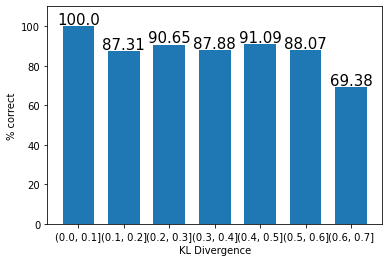

In [33]:
index = []
for i in (correctness.index):
    index.append(str(i))
plt.bar(index,correctness["percent"], width=0.7)
for index,data in enumerate(correctness["percent"]):
    plt.text(x=index , y =data+1 , s=f"{round(data,2)}" , fontdict=dict(fontsize=15),ha='center')
plt.ylim(0,110)
plt.xlabel("KL Divergence")
plt.ylabel("% correct")

### Confidence

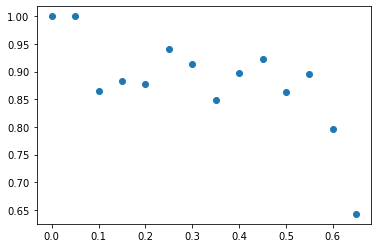

In [34]:
kl = table[["correctness","count"]].groupby(pd.cut(table["KL_div"], np.arange(0, 0.8, 0.05))).apply(sum)
kl["percent"] = (kl["correctness"]/kl["count"])
kl.dropna(inplace=True)
plt.scatter(np.arange(0, 0.70, 0.05), kl["percent"])
# print(kl)
# print(np.arange(0, 0.7, 0.05))

In [35]:
# Linear Regression
from sklearn.linear_model import LinearRegression

x = np.arange(0, 0.70, 0.05).reshape((-1, 1))
y = kl["percent"]
model = LinearRegression().fit(x,y)

In [36]:
print('intercept(alpha):', model.intercept_)
print('slope(theta):', model.coef_)

intercept(alpha): 0.9776182950505219
slope(theta): [-0.29425788]


## Algorithm C: It = argmax(Ct,i)